#  Analysis NBA 2022 Season - Regular Season

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load CSV files

In [5]:
statistics = pd.read_csv("dwh/stats.csv")
games = pd.read_csv("dwh/games.csv")
teams = pd.read_csv("dwh/teams.csv")

## 2. Join the dataframes and filter the result

In [8]:
teams_stats = pd.merge(teams, statistics, on = "team_id", how = "left")
nba_teams_stats = teams_stats.dropna()

## 3. Win-loss comparison for each team

/var/folders/yy/d932fdzd489ddx056zfhyrvw0000gn/T/ipykernel_4154/1310161831.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(teams_name, rotation=45, ha='right')


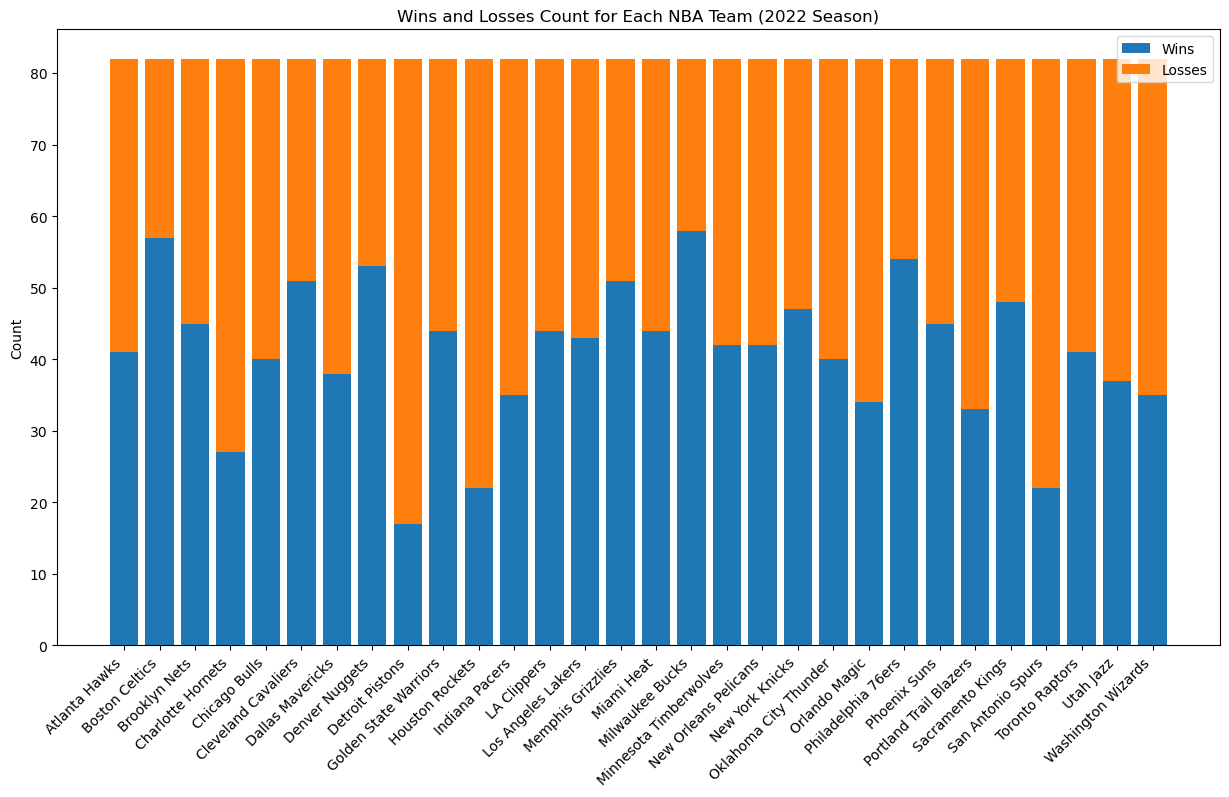

In [11]:
teams_name = nba_teams_stats['full_name']
wins = nba_teams_stats['wins']
losses = nba_teams_stats['losses']

fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.80

ax.bar(teams_name, wins, bar_width, label='Wins')
ax.bar(teams_name, losses, bar_width, bottom=wins, label='Losses')

  # Optional: Set x-ticks to match each team
ax.set_xticklabels(teams_name, rotation=45, ha='right')
ax.legend()

plt.title("Wins and Losses Count for Each NBA Team (2022 Season)")
plt.ylabel("Count")
plt.show()

## 4. Average number of wins and losses

In [14]:
avg_wins = nba_teams_stats["wins"].mean()
avg_losses = nba_teams_stats["losses"].mean()

print(f"The average number of wins in the league in 2022 was {avg_wins}.\nThe average number of losses in the league in 2022 was {avg_losses}.")

The average number of wins in the league in 2022 was 41.0.
The average number of losses in the league in 2022 was 41.0.


## 5. Points scored by Golden State Warriors in the regular season

In [17]:
gsw_games = games[(games["away_team"] == "Golden State Warriors") | (games["home_team"] == "Golden State Warriors")]

gsw_points = []

for index, game in gsw_games.iterrows():
    if game["away_team"] == "Golden State Warriors":
        gsw_points.append(game["a_team_score"])
    if game["home_team"] == "Golden State Warriors":
        gsw_points.append(game["h_team_score"])

/Users/ilariazanoni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x600 with 0 Axes>

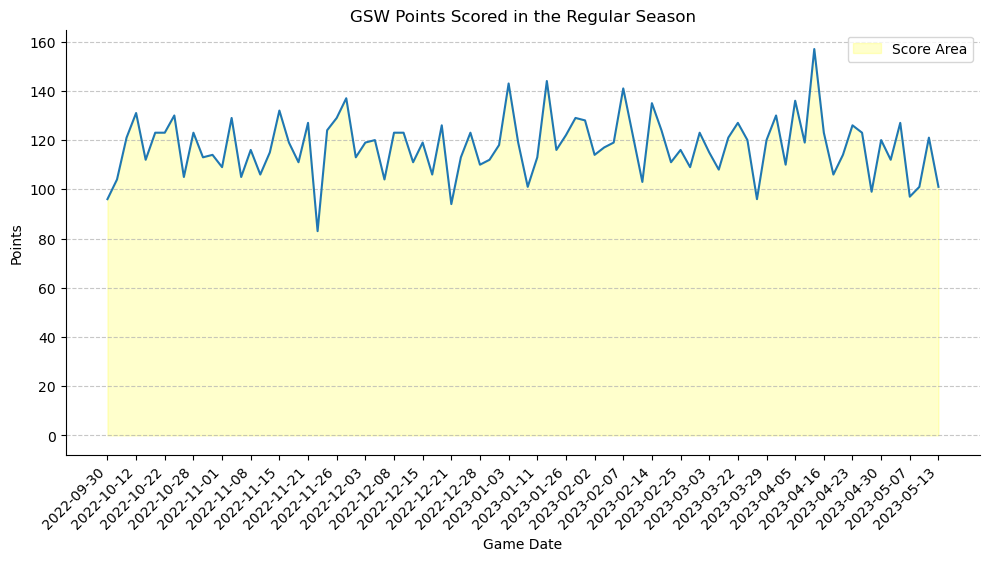

In [19]:
plt.figure(figsize=(18, 6))
xtick_step = 3

sns.relplot(data = gsw_games, x = "date", y = gsw_points, kind = "line", aspect = 2)

plt.fill_between(gsw_games["date"], 0, gsw_points, alpha = 0.2, label = "Score Area", color = "yellow")

plt.xticks(rotation = 45, ha = "right")
plt.gca().set_xticks(plt.gca().get_xticks()[::xtick_step])

plt.title("GSW Points Scored in the Regular Season")
plt.xlabel("Game Date")
plt.ylabel("Points")
plt.grid(True, axis = "y", linestyle = "--", alpha = 0.7)
plt.legend()

plt.show()

## Calculate the average of points scored by Golden State Warriors

In [22]:
avg_gsw_points = sum(gsw_points)/len(gsw_points)
print(f"Golden State Warriors averaged {avg_gsw_points} during the regular season 2022/2023.")

Golden State Warriors averaged 117.60227272727273 during the regular season 2022/2023.


## Calculate the point difference for each game and plot its frequency

In [25]:
pts_difference = []

for index, game in games.iterrows():
    if game["a_team_score"] > game["h_team_score"]:
        pts_difference.append(game["a_team_score"] - game["h_team_score"])
    elif game["a_team_score"] < game["h_team_score"]:
        pts_difference.append(game["h_team_score"] - game["a_team_score"])

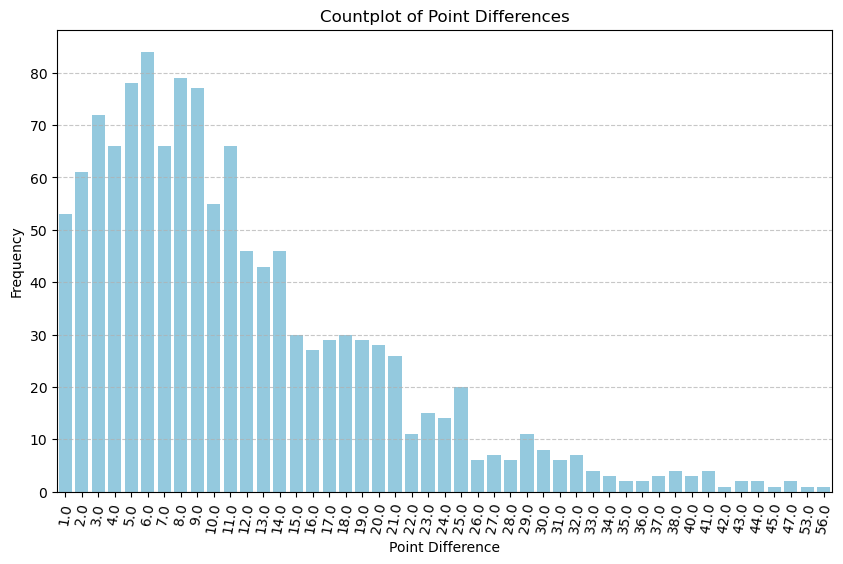

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x=pts_difference, color='skyblue')

plt.title("Countplot of Point Differences")
plt.xlabel("Point Difference")
plt.ylabel("Frequency")
plt.xticks(rotation = 80)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


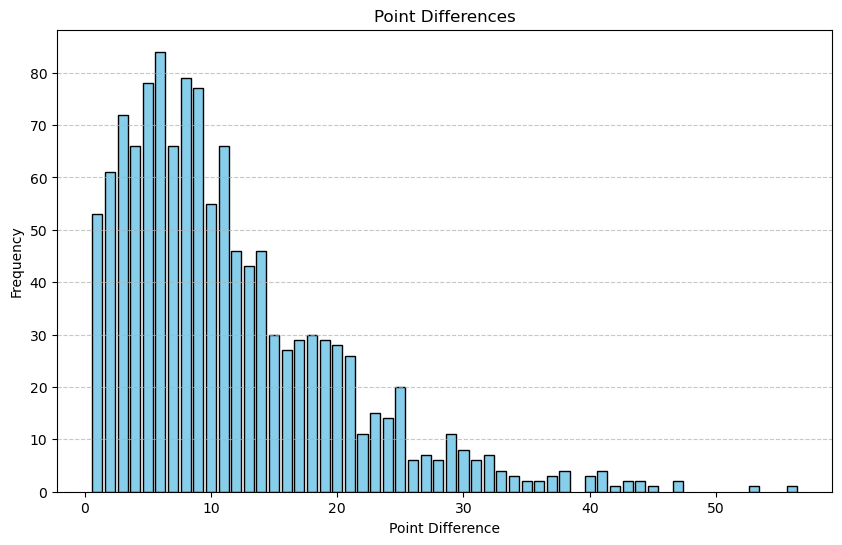

In [251]:
frequency_dict = {diff: pts_difference.count(diff) for diff in set(pts_difference)}

plt.figure(figsize=(10, 6))
plt.bar(frequency_dict.keys(), frequency_dict.values(), width=0.8, color='skyblue', edgecolor='black')

plt.title("Point Differences")
plt.xlabel("Point Difference")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

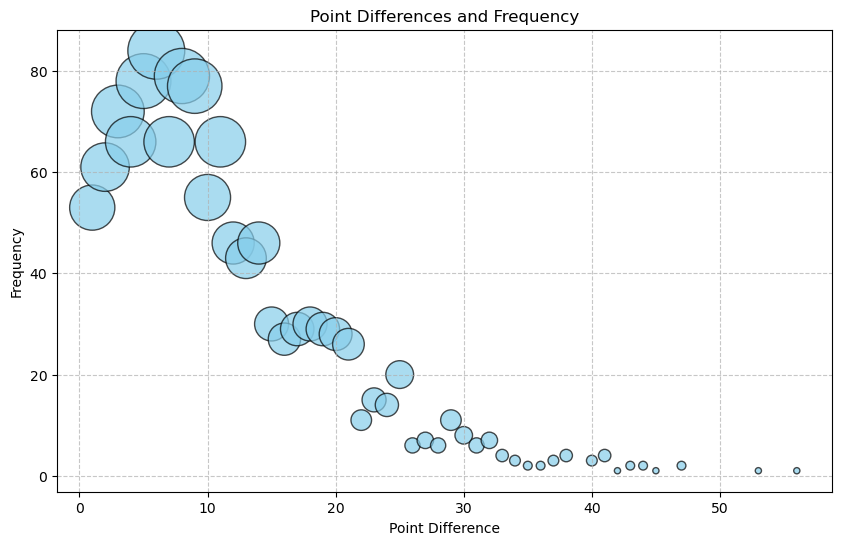

In [245]:
frequency_dict = {diff: pts_difference.count(diff) for diff in set(pts_difference)}

point_diff = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

plt.figure(figsize=(10, 6))
plt.scatter(point_diff, frequency, s=[freq * 20 for freq in frequency], alpha=0.7, c='skyblue', edgecolors='black')

plt.title("Point Differences and Frequency")
plt.xlabel("Point Difference")
plt.ylabel("Frequency")
plt.grid(True, axis="both", linestyle="--", alpha=0.7)

plt.show()